In [1]:
# dict 사용해서 counts

data = [1, 3, 2, 3,3,3, 1, 2, 2]

data_count = dict()

for e in data:
    if e not in data_count:
        data_count[e] = 0
    data_count[e] += 1

In [2]:
data_count

{1: 2, 3: 4, 2: 3}

In [3]:
# 만약 data_count를 초기화하는 과정이 없었다면?
# key error!!
# dict의 value를 증가시키는 과정은 key가 미리 dict 에 선언되어 있어야 함

# defalut dict using > key 초기화 과정 필요 없음

from collections import defaultdict

data_count = defaultdict(int) # int defalut dict 생성
#key가 들어오면, 항상 0으로 먼저 value 초기화

for e in data:
    data_count[e] += 1

data_count


defaultdict(int, {1: 2, 3: 4, 2: 3})

In [4]:
data_str = defaultdict(str)

for e in data:
    data_str[e] += '*'

data_str #여기서는 ''으로 value 값 초기화

defaultdict(str, {1: '**', 3: '****', 2: '***'})

In [6]:
data = defaultdict(int)
with open("SRR000982.filtered.variants.annotated.vcf") as handle:
    for line in handle:
        if line.startswith("#"):
            continue
        
        row = line.strip().split('\t')
        # 7번째 정보가 filter
        data[row[6]] +=1

print(data)

defaultdict(<class 'int'>, {'PASS': 518, 'SNP_FILTER': 170, 'INDEL_FILTER': 2})


In [7]:
for k, v in data.items():
    print(k, v)

PASS 518
SNP_FILTER 170
INDEL_FILTER 2


(array([0, 1, 2]),
 [Text(0, 0, 'PASS'), Text(1, 0, 'SNP_FILTER'), Text(2, 0, 'INDEL_FILTER')])

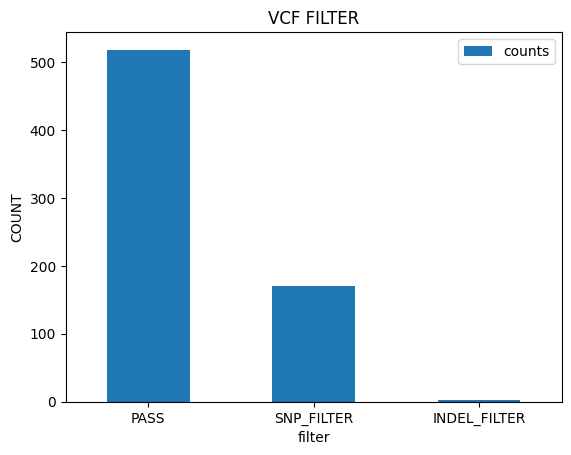

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

data_df = pd.DataFrame({
    'filter': data.keys(),
    'counts': data.values()
})

data_df.plot(x='filter',
             y='counts',
             ylabel='COUNT',
             title= "VCF FILTER",
             kind='bar')

plt.xticks(rotation=0)

In [17]:
data_chr = defaultdict(int)
with open("SRR000982.filtered.variants.annotated.vcf") as handle:
    for line in handle:
        if line.startswith("#"):
            continue
        
        row = line.strip().split('\t')
        # 7번째 정보가 filter
        if row[6] == 'PASS':
            data_chr[row[0]]+=1


print(data_chr)

defaultdict(<class 'int'>, {'chrM': 61, 'chr1': 33, 'chr2': 19, 'chr3': 29, 'chr4': 24, 'chr5': 16, 'chr6': 19, 'chr7': 16, 'chr8': 7, 'chr9': 12, 'chr10': 61, 'chr11': 24, 'chr12': 8, 'chr13': 2, 'chr14': 6, 'chr15': 2, 'chr16': 64, 'chr17': 41, 'chr18': 34, 'chr20': 4, 'chr21': 6, 'chrX': 4, 'chrY': 4, 'chr4_gl000193_random': 2, 'chrUn_gl000219': 2, 'chrUn_gl000220': 4, 'chrUn_gl000225': 12, 'chrUn_gl000228': 2})


<AxesSubplot: title={'center': 'VCF variants count'}, xlabel='COUNT'>

<Figure size 800x800 with 0 Axes>

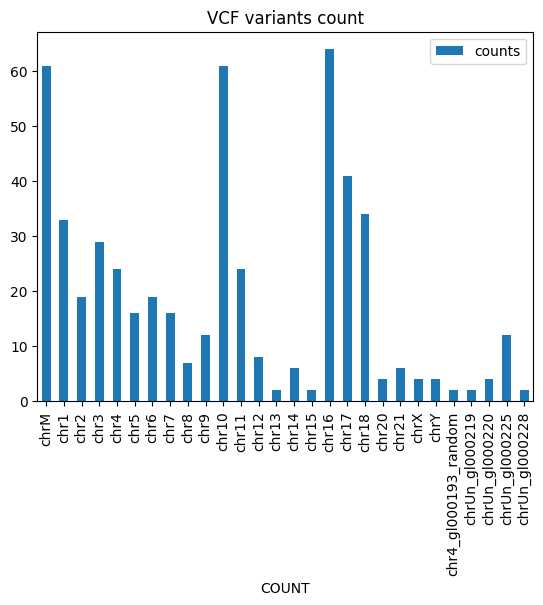

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data_df = pd.DataFrame({
    'chr': data_chr.keys(),
    'counts': data_chr.values()
})

plt.figure(figsize=(8,8))

data_df.plot(x='chr',
             y='counts',
             xlabel='COUNT',
             title= "VCF variants count",
             kind='bar')


<AxesSubplot: xlabel='counts', ylabel='filter'>

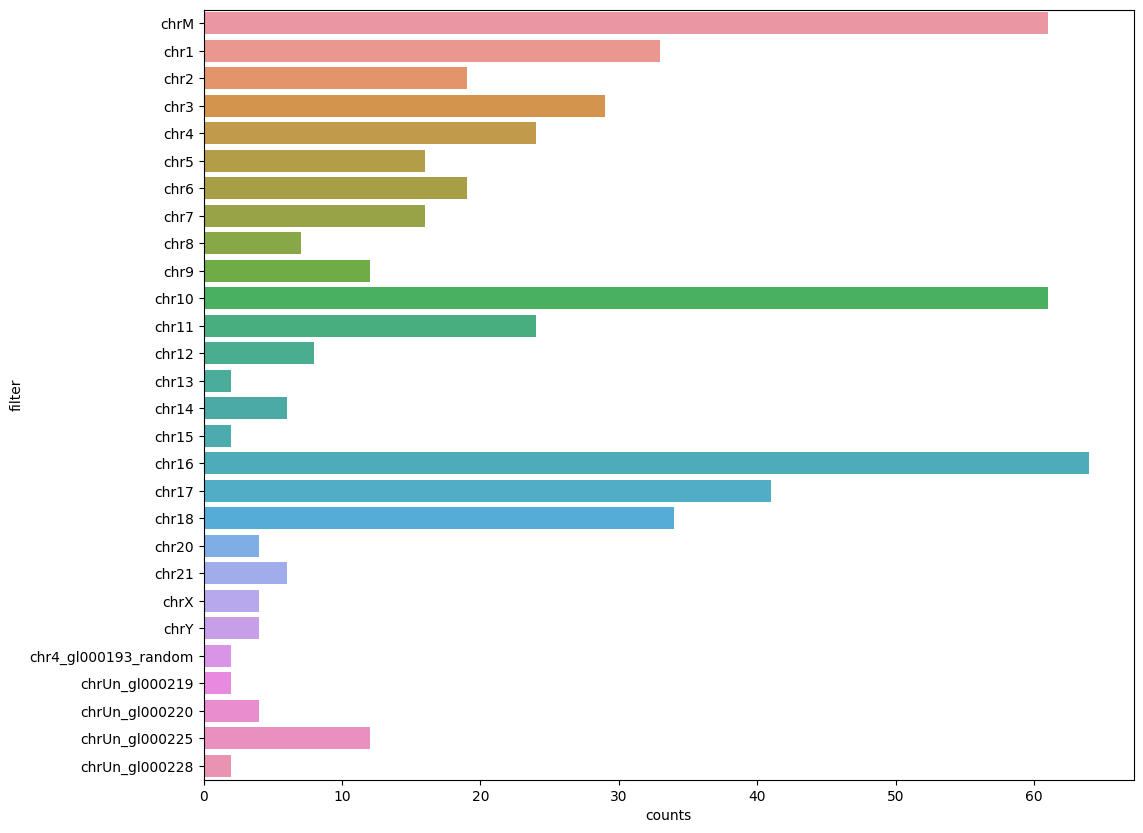

In [24]:
import seaborn as sns #좀 더 보기 편한 picture

plt.figure(figsize=(12,10))

sns.barplot(y='chr', x='counts', data=data_df)